In [2]:
# Importing Libraries 
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst data
df_DA = df[df['job_title_short'] == 'Data Analyst' ].copy()

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\Osama\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Thu Oct 10 08:48:37 2024).


In [4]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
# Create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

Customizing our chart from 12_Exercise_Trending_Skills.ipynb


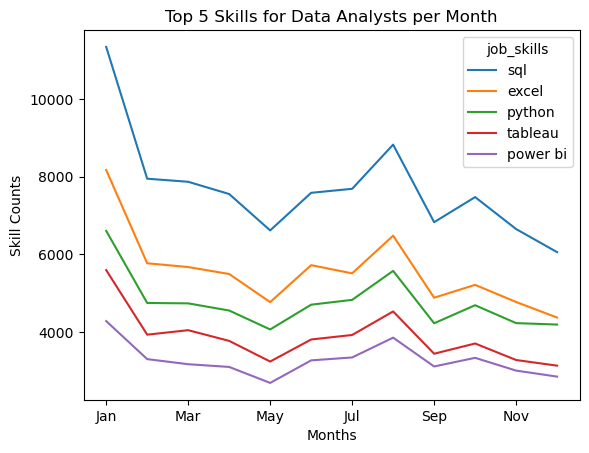

In [12]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
# Create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the job_skills column and pivot  
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# Sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

# Get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Skill Counts')
plt.xlabel('Months')
plt.show()

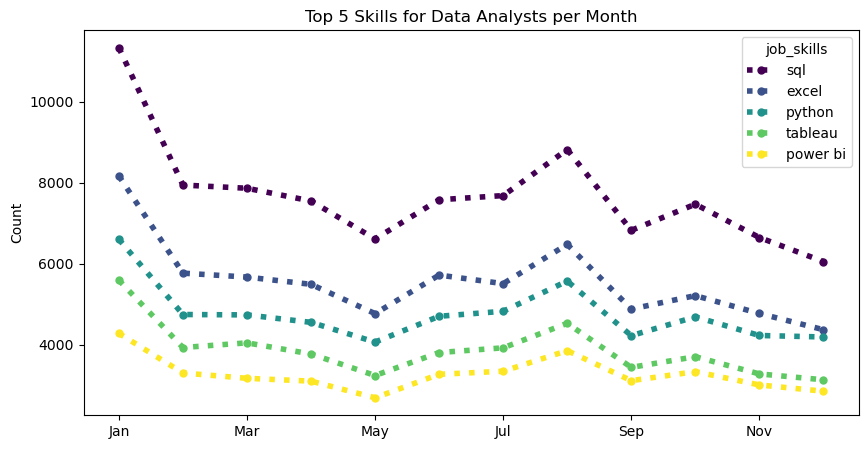

In [31]:
df_DA_pivot.iloc[:, :5].plot(
    kind="line",
    linewidth= 4,
    linestyle=":", # options: "-", "--", "-.", ":"
    colormap="viridis",
    marker="o", # options: 'o', 'x', '*', '.', ',', '1', '2', '3', '4', ---
    markersize=5,
    figsize=(10, 5)
)
plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [57]:
# Explode the 'job_skills' into individual rows
df_exploded = df.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary = ('salary_year_avg', 'median'),
    skill_count = ('job_skills', 'count')
)

# Limit to the top skills
skill_count = 10
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

skill_stats


,median_salary,skill_count
job_skills,,
sql,120000.0,384849
python,125000.0,380909
aws,135000.0,145381
azure,125000.0,132527
r,119550.0,130892
tableau,111175.0,127213
excel,92500.0,127018
spark,140000.0,114609
power bi,102000.0,98147


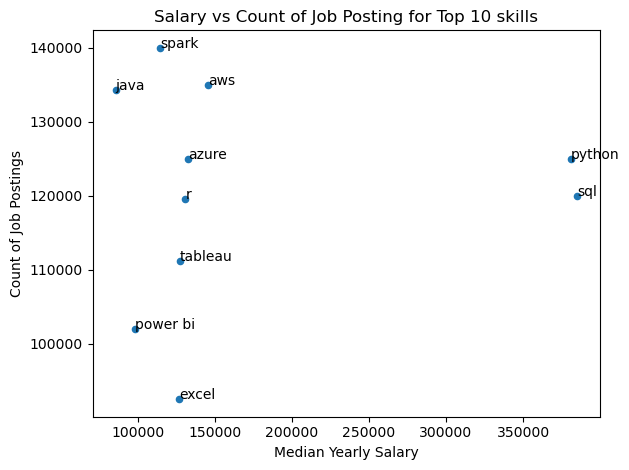

In [59]:
skill_stats.plot(kind='scatter', x ='skill_count', y ='median_salary')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.ylabel('Count of Job Postings')
plt.xlabel('Median Yearly Salary')
plt.title(f'Salary vs Count of Job Posting for Top {skill_count} skills')
plt.tight_layout()
plt.show()